# Multiple Linear Regression
Bike Sharing Assignment
Problem Statement:
Required to model the demand for shared bikes with the available independent variables. 
It will be used by the management to understand how exactly the demands vary with different features. 
They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

## Step 1: Reading and Understanding the Data
Let us first import NumPy and Pandas and read the housing dataset

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

In [3]:
Bikeshare = pd.read_csv("day.csv")

In [4]:
Bikeshare.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Inspect the various aspects of the Bikeshare dataframe

In [5]:
Bikeshare.shape

(730, 16)

This dataset has 16 Features with 730 records and the data is talking about 2 years of data, 
each record is talking about each day of that particular date's transaction.
This data is talking about various factors like temperature and feel like temperature humidity wind for various seasons and weather conditions


In [6]:
Bikeshare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
Bikeshare.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
Bikeshare.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

We Observed that there are no null values are available so no need of any imputation 

## Step 2: Visualising the Data
Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

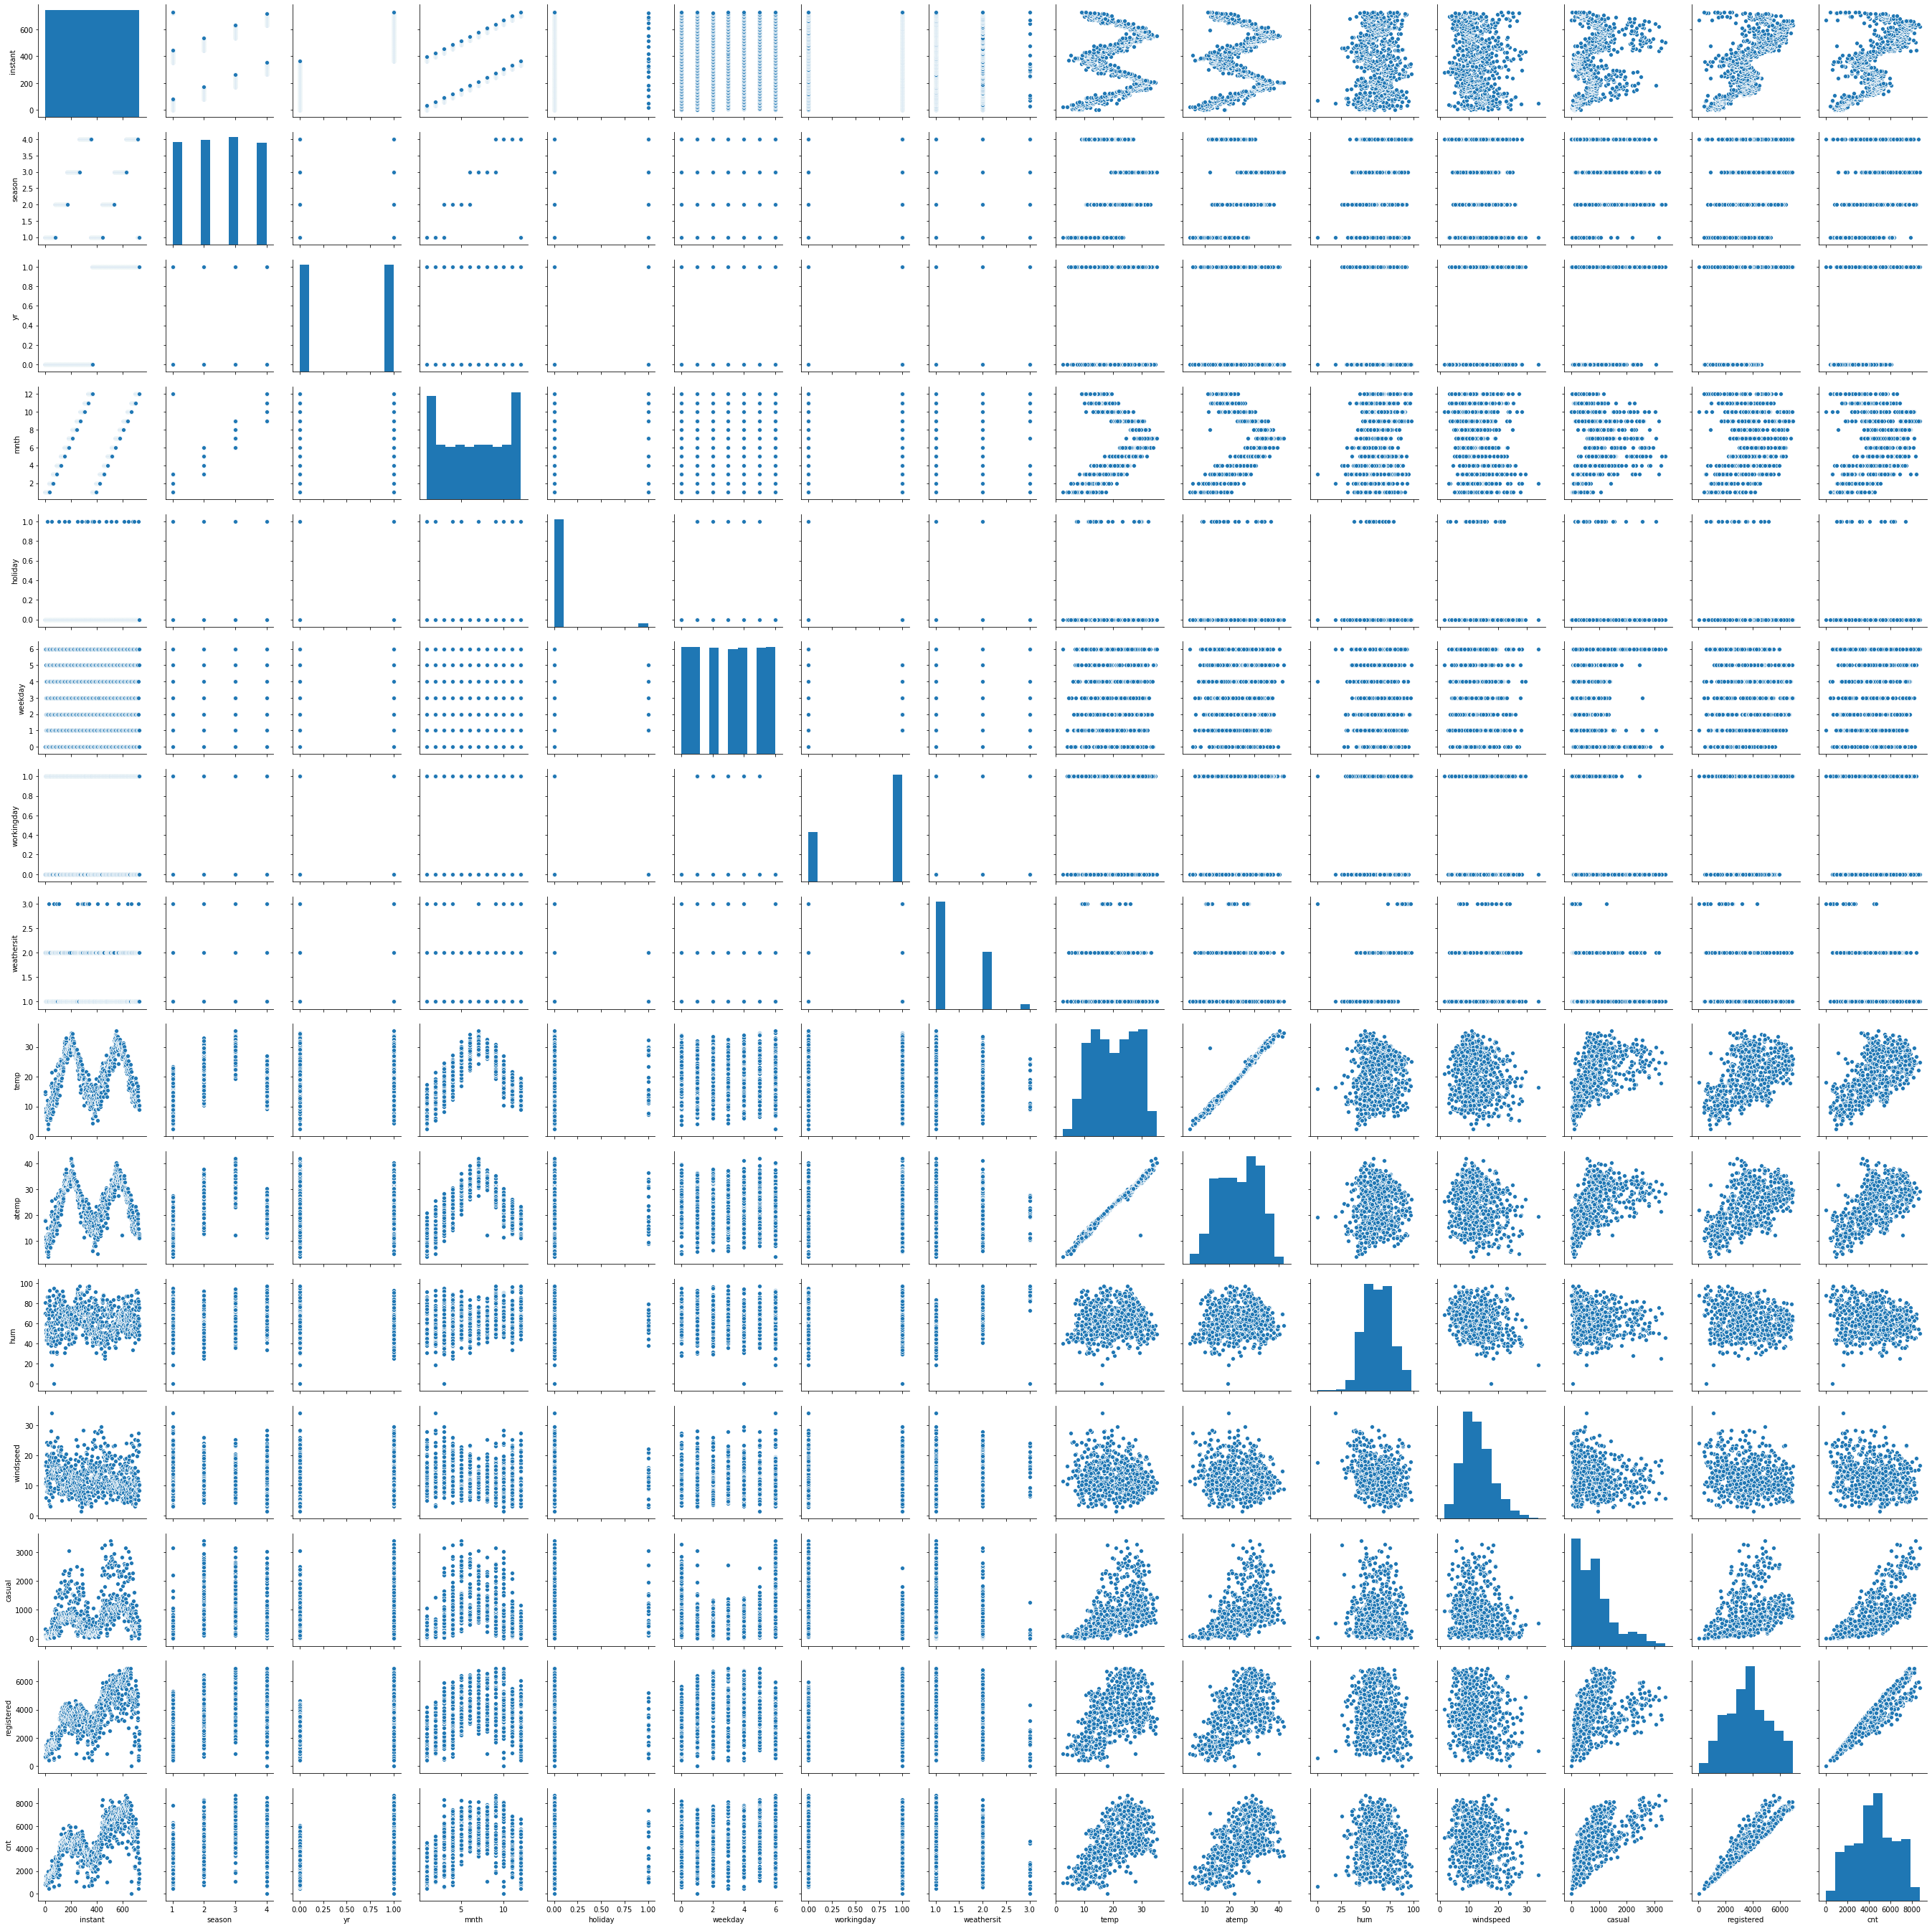

In [10]:
sns.pairplot(Bikeshare)
plt.show()

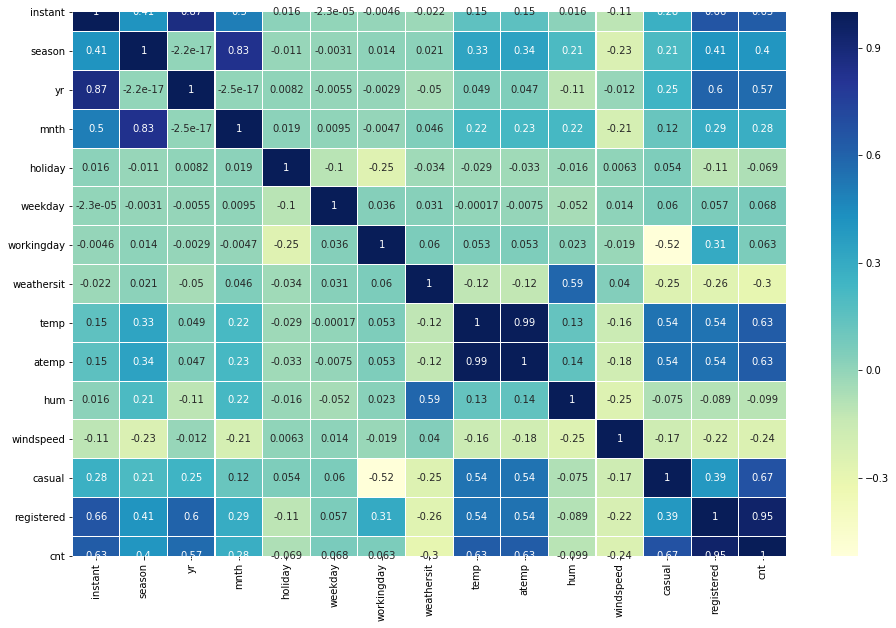

In [11]:
plt.figure(figsize = (16, 10))
sns.heatmap(Bikeshare.corr(), cmap="YlGnBu", annot = True,linecolor = 'white',linewidths=0.1)
plt.show()

#### Observations:-
   
   1.Temp and atemp are highly correlated to each other since both the features are almost same one is talking about actual temperature where as another is talking about the feel like temperature
   
   2.Humidity is inversely correlated to count hence co relation is negative, This proved that people doesn’t want to go by bike when there is a lot of humidity
   
   3.Windspeed also inversely related to count, since the wind speed is more people doesn’t want to go by bike, since it's tough to pedal
   
   4.Weather is inversely proportional to count , this is because as the weather become worst the no of people willing to travel by bike also will reduce
   
   5.Holiday also have the inverse relationship with the count , this is because the number of travelers will be less during holidays
   
   6.Casual/Registered are highly correlated with the count this is becase the customers are either registered or casual so they are highly correlated

##### By Observing the pair plot we can categorize the fileds as mentioned below.

Categorical variable:-
- Season
- yr(Binary)
- mnth
- holiday(binary)
- weekday
- workingday(binary)
- weathersit

Continuous variables:-
- windspeed
- temp
- atemp
- instant
- dteday
- hum
- casual
- registered
- cnt

boxplot/bar plot can give the better visaulization of the categorical variables, lets see their impact againest the count variable

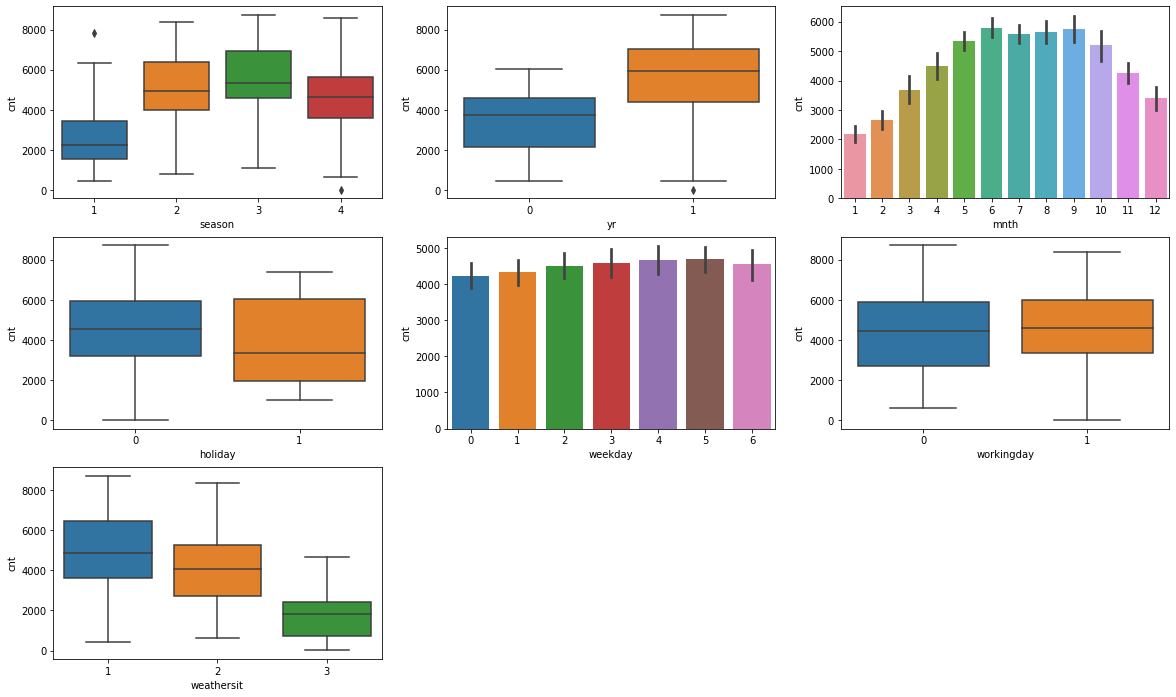

In [12]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = Bikeshare)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = Bikeshare)
plt.subplot(3,3,3)
sns.barplot(x = 'mnth', y = 'cnt', data = Bikeshare)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = Bikeshare)
plt.subplot(3,3,5)
sns.barplot(x = 'weekday', y = 'cnt', data = Bikeshare)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = Bikeshare)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = Bikeshare)
plt.show()

#### Observations by comapring the ctaegrical variable againest target variable (cnt):-
   
    - Observed that season 3 (fall) has effective impact on the count and can see that people are willing to travel by bicycle during fall where are they are not likely go by bicycle during Spring .There are few outliers between spring and winter for count which are very rare scenarios
    - 2018 has less mean/median values againest count comparitively 2019 , People started using the bike rent in 2018 which has grown in 2019
    - Months like september and June has grete demand for cycle rental business where as in january people are less likely to go by Bicycle
    - the count is more when ever weather is clear comparitively mist cloudy or lightsnow, Where as when ever its heavy rain no one is interested in renting the bikes, as obvious

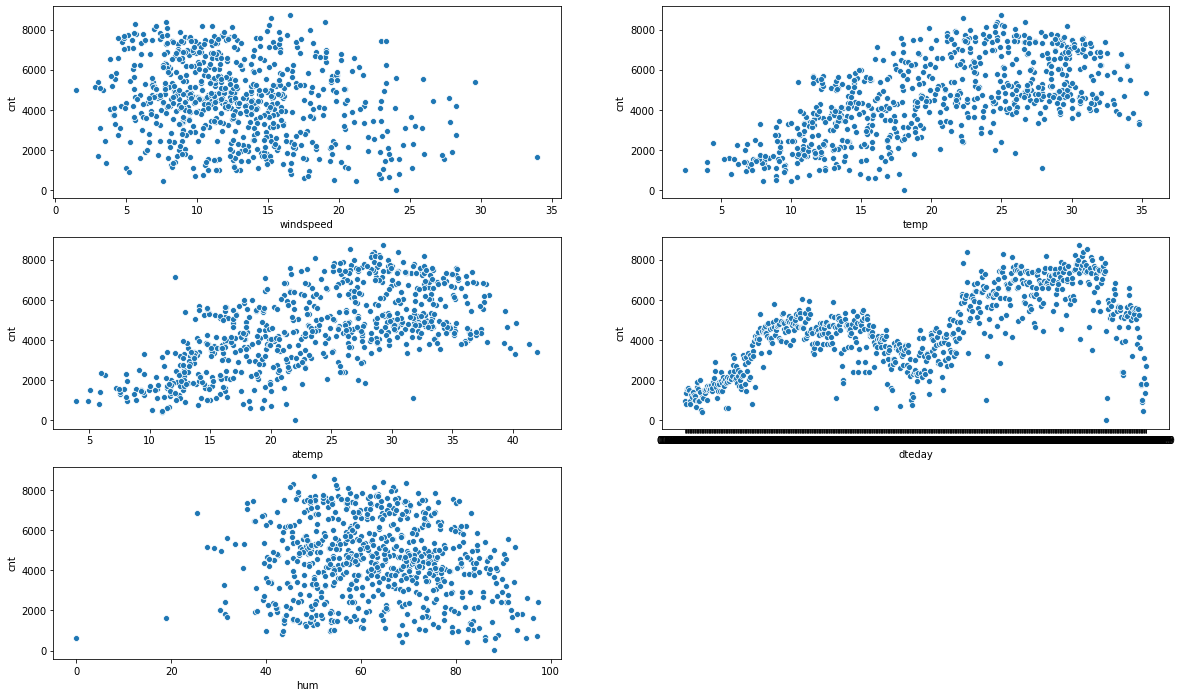

In [13]:

plt.figure(figsize=(20, 12))
plt.subplot(3,2,1)
sns.scatterplot(x = 'windspeed', y = 'cnt', data = Bikeshare)
plt.subplot(3,2,2)
sns.scatterplot(x = 'temp', y = 'cnt', data = Bikeshare)
plt.subplot(3,2,3)
sns.scatterplot(x = 'atemp', y = 'cnt', data = Bikeshare)
plt.subplot(3,2,4)
sns.scatterplot(x = 'dteday', y = 'cnt', data = Bikeshare)
plt.subplot(3,2,5)
sns.scatterplot(x = 'hum', y = 'cnt', data = Bikeshare)
plt.show()

# Step 3: Data Preparation

We can observe in the dataset that some of the variables like 'weathersit' and 'season' have values as 1, 2, 3, 4 which have specific labels associated with them (as can be seen in the data dictionary). These numeric values associated with the labels may indicate that there is some order to them - which is actually not the case (Check the data dictionary and think why). So, it is advisable to convert such feature values into categorical string values before proceeding with model building.

- Converting the Season variable to respective values ,so that it explains better

In [14]:
Bikeshare['season'] = Bikeshare['season'].replace([1,2,3,4], ['spring','summer','fall','winter'])

In [15]:
##Observed that fall has the maximum count 
Bikeshare['season'].describe()

count      730
unique       4
top       fall
freq       188
Name: season, dtype: object

- Converting the Weathersit variable to respective values ,so that it explains better

In [16]:
Bikeshare['weathersit'] = Bikeshare['weathersit'].replace([1,2,3,4], ['Clear','Mist_Cloudy','Light_Snow','Heavy_Rain'])

In [17]:
## This explains that clear wether has more frequency
Bikeshare['weathersit'].describe()

count       730
unique        3
top       Clear
freq        463
Name: weathersit, dtype: object

#### Fields like month and weekday also can be populated with the proper values instead of numerical values 

In [18]:
Bikeshare['mnth'] = Bikeshare['mnth'].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

In [19]:
Bikeshare['weekday'] = Bikeshare['weekday'].map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

In [20]:
Bikeshare['yr'] = Bikeshare['yr'].map({0:'2018',1:'2019'})

- Now we can observe that categorical variables like season,weathersit ,mnth and weekday has been converted to Object type

In [21]:
Bikeshare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null object
yr            730 non-null object
mnth          730 non-null object
holiday       730 non-null int64
weekday       730 non-null object
workingday    730 non-null int64
weathersit    730 non-null object
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(6), object(6)
memory usage: 91.4+ KB


### Dummy Variabls

As part of datapreparation for linear/multiple linear regression we need to create the categorical variables to dumm variables so that they will be ready for regression

Creating dummay variables for Season,Mnth,Weekday and Weathersit only since the other 3 categorial variable are binary variables which contain only yes or no flags and need not to be converted as dummy variables

While creating the dummy variable it is always good to use drop_first as True , since out of n different values for a particuler categorical variable its always suggest to create n-1 dummies , since the nth one doen't have much to explain as other variables have already expalined everything

In [22]:
#Creation of dummy variable for season#
season=pd.get_dummies(Bikeshare['season'],prefix='season' ,drop_first = True)
Bikeshare=pd.concat([Bikeshare,season],axis=1)
Bikeshare.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_spring,season_summer,season_winter
0,1,01-01-2018,spring,2018,Jan,0,Sat,0,Mist_Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0
1,2,02-01-2018,spring,2018,Jan,0,Sun,0,Mist_Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0
2,3,03-01-2018,spring,2018,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0
3,4,04-01-2018,spring,2018,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0
4,5,05-01-2018,spring,2018,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0


- here i am not using drop_first as True since the weathersit has already having 3 distinct values where as as per data dictionary there are 4 types of weathersit values

In [23]:
#Creation of dummy variable for weathersit#
weathers=pd.get_dummies(Bikeshare['weathersit'],prefix='weather',drop_first = True)
Bikeshare=pd.concat([Bikeshare,weathers],axis=1)
Bikeshare.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,hum,windspeed,casual,registered,cnt,season_spring,season_summer,season_winter,weather_Light_Snow,weather_Mist_Cloudy
0,1,01-01-2018,spring,2018,Jan,0,Sat,0,Mist_Cloudy,14.110847,...,80.5833,10.749882,331,654,985,1,0,0,0,1
1,2,02-01-2018,spring,2018,Jan,0,Sun,0,Mist_Cloudy,14.902598,...,69.6087,16.652113,131,670,801,1,0,0,0,1
2,3,03-01-2018,spring,2018,Jan,0,Mon,1,Clear,8.050924,...,43.7273,16.636703,120,1229,1349,1,0,0,0,0
3,4,04-01-2018,spring,2018,Jan,0,Tue,1,Clear,8.200000,...,59.0435,10.739832,108,1454,1562,1,0,0,0,0
4,5,05-01-2018,spring,2018,Jan,0,Wed,1,Clear,9.305237,...,43.6957,12.522300,82,1518,1600,1,0,0,0,0


In [24]:
#Creation of dummy variable for mnth#
mnth=pd.get_dummies(Bikeshare['mnth'],drop_first = True)
Bikeshare=pd.concat([Bikeshare,mnth],axis=1)
Bikeshare.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1,01-01-2018,spring,2018,Jan,0,Sat,0,Mist_Cloudy,14.110847,...,0,0,1,0,0,0,0,0,0,0
1,2,02-01-2018,spring,2018,Jan,0,Sun,0,Mist_Cloudy,14.902598,...,0,0,1,0,0,0,0,0,0,0
2,3,03-01-2018,spring,2018,Jan,0,Mon,1,Clear,8.050924,...,0,0,1,0,0,0,0,0,0,0
3,4,04-01-2018,spring,2018,Jan,0,Tue,1,Clear,8.200000,...,0,0,1,0,0,0,0,0,0,0
4,5,05-01-2018,spring,2018,Jan,0,Wed,1,Clear,9.305237,...,0,0,1,0,0,0,0,0,0,0


In [25]:
#Creation of dummy variable for weekday#
weekday=pd.get_dummies(Bikeshare['weekday'],drop_first = True)
Bikeshare=pd.concat([Bikeshare,weekday],axis=1)
Bikeshare.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
0,1,01-01-2018,spring,2018,Jan,0,Sat,0,Mist_Cloudy,14.110847,...,0,0,0,0,0,1,0,0,0,0
1,2,02-01-2018,spring,2018,Jan,0,Sun,0,Mist_Cloudy,14.902598,...,0,0,0,0,0,0,1,0,0,0
2,3,03-01-2018,spring,2018,Jan,0,Mon,1,Clear,8.050924,...,0,0,0,0,1,0,0,0,0,0
3,4,04-01-2018,spring,2018,Jan,0,Tue,1,Clear,8.200000,...,0,0,0,0,0,0,0,0,1,0
4,5,05-01-2018,spring,2018,Jan,0,Wed,1,Clear,9.305237,...,0,0,0,0,0,0,0,0,0,1


In [26]:
#Creation of dummy variable for weekday#
yr=pd.get_dummies(Bikeshare['yr'],prefix='yr',drop_first = True)
Bikeshare=pd.concat([Bikeshare,yr],axis=1)
Bikeshare.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,yr_2019
0,1,01-01-2018,spring,2018,Jan,0,Sat,0,Mist_Cloudy,14.110847,...,0,0,0,0,1,0,0,0,0,0
1,2,02-01-2018,spring,2018,Jan,0,Sun,0,Mist_Cloudy,14.902598,...,0,0,0,0,0,1,0,0,0,0
2,3,03-01-2018,spring,2018,Jan,0,Mon,1,Clear,8.050924,...,0,0,0,1,0,0,0,0,0,0
3,4,04-01-2018,spring,2018,Jan,0,Tue,1,Clear,8.200000,...,0,0,0,0,0,0,0,1,0,0
4,5,05-01-2018,spring,2018,Jan,0,Wed,1,Clear,9.305237,...,0,0,0,0,0,0,0,0,1,0


In [27]:
Bikeshare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 39 columns):
instant                730 non-null int64
dteday                 730 non-null object
season                 730 non-null object
yr                     730 non-null object
mnth                   730 non-null object
holiday                730 non-null int64
weekday                730 non-null object
workingday             730 non-null int64
weathersit             730 non-null object
temp                   730 non-null float64
atemp                  730 non-null float64
hum                    730 non-null float64
windspeed              730 non-null float64
casual                 730 non-null int64
registered             730 non-null int64
cnt                    730 non-null int64
season_spring          730 non-null uint8
season_summer          730 non-null uint8
season_winter          730 non-null uint8
weather_Light_Snow     730 non-null uint8
weather_Mist_Cloudy    730 non-null uint8

- We can observe that there are 38 variable are created using the original dataset of just 16 variables, Now it's our turn to drop the original categorical variable which are no more required since the dummy variables can expalin everything categorical variables are doing

In [28]:
Bikeshare.drop(['season','weathersit','weekday','mnth','yr'],inplace=True,axis=1)

In [29]:
Bikeshare.head()

,instant,dteday,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,...,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,yr_2019
0,1,01-01-2018,0,0,14.110847,18.18125,80.5833,10.749882,331,654,...,0,0,0,0,1,0,0,0,0,0
1,2,02-01-2018,0,0,14.902598,17.68695,69.6087,16.652113,131,670,...,0,0,0,0,0,1,0,0,0,0
2,3,03-01-2018,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,...,0,0,0,1,0,0,0,0,0,0
3,4,04-01-2018,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,...,0,0,0,0,0,0,0,1,0,0
4,5,05-01-2018,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,...,0,0,0,0,0,0,0,0,1,0


### Drop the unnecessary variables
The heat map generated above clearly shows that that Casual and Resisted has highly correlation with cnt , This is because the combination of casual and registered gives the cnt value. We don’t need 3 target variables for our Modeling hence we can drop casual and registered.
The fields like instant which is just a sequence number for each record and doesn’t have much relationship with target variable hence this  feature is not required for our modeling  and can be dropped, whereas dteday explains the date of the transaction which can be achieved from yr, mnth and day variables hence this also can be dropped

In [30]:
Bikeshare.drop(['casual','registered','instant','dteday'],inplace=True,axis=1)

In [31]:
Bikeshare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
holiday                730 non-null int64
workingday             730 non-null int64
temp                   730 non-null float64
atemp                  730 non-null float64
hum                    730 non-null float64
windspeed              730 non-null float64
cnt                    730 non-null int64
season_spring          730 non-null uint8
season_summer          730 non-null uint8
season_winter          730 non-null uint8
weather_Light_Snow     730 non-null uint8
weather_Mist_Cloudy    730 non-null uint8
Aug                    730 non-null uint8
Dec                    730 non-null uint8
Feb                    730 non-null uint8
Jan                    730 non-null uint8
Jul                    730 non-null uint8
Jun                    730 non-null uint8
Mar                    730 non-null uint8
May                    730 non-null uint8
Nov                    730 non-null uint8
Oct  

- Now we can observe that our dataset has 30 variable and ready for the next steps

In [32]:
Bikeshare.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,yr_2019
0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,1,0


# Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [33]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
Bikeshare_train, Bikeshare_test = train_test_split(Bikeshare, train_size = 0.7, test_size = 0.3, random_state = 100)

- Inspecting the training data , we need to model our solution on top of this training data now

In [34]:
Bikeshare_train.shape

(510, 30)

In [35]:
Bikeshare_train.describe()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,yr_2019
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.025490,0.676471,20.102429,23.493909,63.112926,12.831318,4486.382353,0.243137,0.245098,0.24902,...,0.086275,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.507843
std,0.157763,0.468282,7.431169,8.090038,14.156632,5.291832,1952.158739,0.429398,0.430568,0.43287,...,0.281045,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.500429
min,0.000000,0.000000,2.424346,3.953480,0.000000,2.834381,22.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,13.606865,16.603063,52.270825,9.041918,3120.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,20.209597,24.020400,63.437500,12.083182,4530.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,1.000000,26.615847,30.177700,73.250025,15.750879,5973.500000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,35.328347,42.044800,97.041700,34.000021,8714.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Rescaling the Features 
As per the above step we cna observe that max and minimum values of the continuous variables like temp,atemp,hum,windspeed are not in proper scale so we need to Scale all continuous variables so that it will hep us to get the better coeffiecient with multiple features.  

There are two major scaling approaches are there and  We have chosen Min max scaling approach

In [36]:
from sklearn.preprocessing import MinMaxScaler

In [37]:
scaler = MinMaxScaler()

In [38]:
# Apply scaler() to all the columns except 'binary' and  'dummy' variables

num_vars = ['temp','atemp','hum','windspeed','cnt']
Bikeshare_train[num_vars] = scaler.fit_transform(Bikeshare_train[num_vars])
Bikeshare_train.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,yr_2019
653,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,1,...,0,1,0,0,0,0,0,1,0,1
576,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,0,1,0,1
426,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,0,1,0,0,0,0,1
728,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,0,1,0,0,0,1
482,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [39]:
Bikeshare_train.describe()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,yr_2019
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.086275,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.507843
std,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.281045,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.500429
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- Now we can observe that all the variables are adjested between zero and one

#### Lets check the correlation coefficient of revised variables

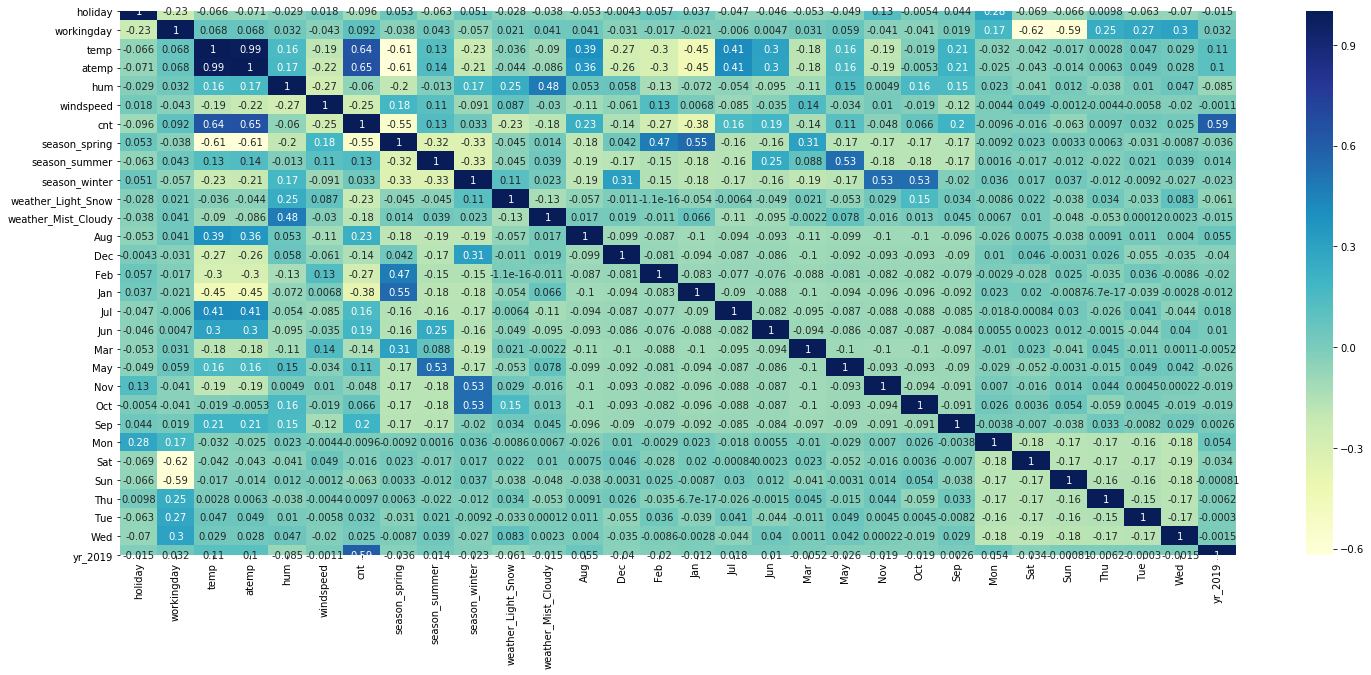

In [40]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25, 10))
sns.heatmap(Bikeshare_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

We can see that temperature has good corelationship with count variable

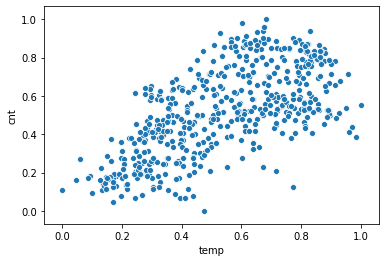

In [41]:

sns.scatterplot(x = 'temp', y = 'cnt', data = Bikeshare_train)
plt.show()

### Dividing into X and Y sets for the model building

In [42]:
y_train = Bikeshare_train.pop('cnt')
X_train = Bikeshare_train

## Step 5: Building our model

We are performing the RFE(Recursive feature elimination) for our modeling  which has teh capability to chose the features automatically for our modeling post which we will perform manual feature selection process that can fit our model

In [43]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

- We are chosing top 15 featurs out of 31 featurs randomly using RFE for our modling process using the below step

In [44]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [45]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 7),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('weather_Light_Snow', True, 1),
 ('weather_Mist_Cloudy', True, 1),
 ('Aug', False, 8),
 ('Dec', False, 4),
 ('Feb', False, 5),
 ('Jan', False, 2),
 ('Jul', True, 1),
 ('Jun', False, 14),
 ('Mar', False, 15),
 ('May', False, 6),
 ('Nov', False, 3),
 ('Oct', False, 13),
 ('Sep', True, 1),
 ('Mon', False, 9),
 ('Sat', True, 1),
 ('Sun', True, 1),
 ('Thu', False, 11),
 ('Tue', False, 10),
 ('Wed', False, 12),
 ('yr_2019', True, 1)]

##### The below step gives the top 15 featurs identified for our modeling using RFE

In [46]:
col = X_train.columns[rfe.support_]
col

Index(['holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'weather_Light_Snow',
       'weather_Mist_Cloudy', 'Jul', 'Sep', 'Sat', 'Sun', 'yr_2019'],
      dtype='object')

In [47]:
X_train.columns[~rfe.support_]

Index(['atemp', 'Aug', 'Dec', 'Feb', 'Jan', 'Jun', 'Mar', 'May', 'Nov', 'Oct',
       'Mon', 'Thu', 'Tue', 'Wed'],
      dtype='object')

#### Building model using statsmodel, for the detailed statistics and Printing the summary of the model obtained

In [48]:
X_train_rf = X_train[col]

In [49]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rf)

In [50]:
lr_1 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [51]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Mon, 08 Jun 2020   Prob (F-statistic):          1.13e-191
Time:                        12:15:17   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1989    

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_rf.columns
vif['VIF'] = [variance_inflation_factor(X_train_rf.values, i) for i in range(X_train_rf.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,50.69
12,Sat,12.20
13,Sun,11.79
5,season_spring,5.02
2,temp,3.62
7,season_winter,3.49
0,holiday,2.91
6,season_summer,2.61
3,hum,1.91
9,weather_Mist_Cloudy,1.57


In [53]:
# Dropping highly correlated variables and insignificant variables sun has max p value hance we can drop it

X = X_train_rf.drop('holiday', 1,)

In [54]:
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [55]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Mon, 08 Jun 2020   Prob (F-statistic):          1.13e-191
Time:                        12:15:18   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1799    

In [56]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,32.14
1,temp,18.98
0,workingday,18.41
11,Sat,4.91
3,windspeed,4.90
4,season_spring,4.80
12,Sun,4.76
6,season_winter,3.71
5,season_summer,3.03
8,weather_Mist_Cloudy,2.31


In [57]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('Sun', 1,)

In [58]:
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [59]:
# Print the summary of the model
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     209.4
Date:                Mon, 08 Jun 2020   Prob (F-statistic):          8.51e-192
Time:                        12:15:18   Log-Likelihood:                 515.37
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     496   BIC:                            -943.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2298    

In [60]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,28.41
1,temp,16.87
0,workingday,4.71
3,windspeed,4.70
4,season_spring,4.18
6,season_winter,3.40
5,season_summer,2.83
8,weather_Mist_Cloudy,2.28
12,yr_2019,2.08
11,Sat,1.84


In [61]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('hum', 1,)

In [62]:
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_4 = sm.OLS(y_train, X_train_lm).fit()

In [63]:
# Print the summary of the model
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     218.1
Date:                Mon, 08 Jun 2020   Prob (F-statistic):          3.28e-189
Time:                        12:15:19   Log-Likelihood:                 506.42
No. Observations:                 510   AIC:                            -986.8
Df Residuals:                     497   BIC:                            -931.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1493    

In [64]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,6.73
0,workingday,4.65
2,windspeed,4.64
3,season_spring,2.38
4,season_summer,2.31
11,yr_2019,2.07
5,season_winter,1.92
10,Sat,1.83
8,Jul,1.58
7,weather_Mist_Cloudy,1.56


In [65]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('Jul', 1,)

In [66]:
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_5 = sm.OLS(y_train, X_train_lm).fit()

In [67]:
# Print the summary of the model
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     234.4
Date:                Mon, 08 Jun 2020   Prob (F-statistic):          6.86e-189
Time:                        12:15:19   Log-Likelihood:                 502.83
No. Observations:                 510   AIC:                            -981.7
Df Residuals:                     498   BIC:                            -930.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1405    

In [68]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.48
0,workingday,4.65
2,windspeed,4.63
3,season_spring,2.30
10,yr_2019,2.07
4,season_summer,1.99
9,Sat,1.83
5,season_winter,1.77
7,weather_Mist_Cloudy,1.56
8,Sep,1.23


In [69]:
X = X.drop('season_spring', 1,)

In [70]:
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_6 = sm.OLS(y_train, X_train_lm).fit()

In [71]:
# Print the summary of the model
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     254.0
Date:                Mon, 08 Jun 2020   Prob (F-statistic):          1.47e-188
Time:                        12:15:19   Log-Likelihood:                 499.18
No. Observations:                 510   AIC:                            -976.4
Df Residuals:                     499   BIC:                            -929.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0753    

In [72]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,4.76
0,workingday,4.04
2,windspeed,3.43
9,yr_2019,2.02
8,Sat,1.69
3,season_summer,1.57
6,weather_Mist_Cloudy,1.53
4,season_winter,1.40
7,Sep,1.20
5,weather_Light_Snow,1.08


## Step 6: Residual Analysis of the train data

In [73]:
y_train_count = lr_6.predict(X_train_lm)

Text(0.5, 0, 'Errors')

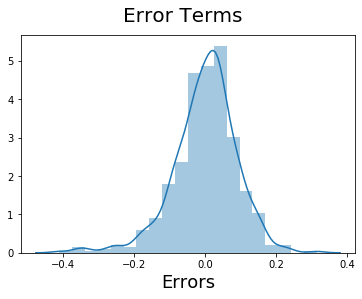

In [74]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_count), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

# Step 7: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.

In [75]:
num_vars = ['temp','atemp','hum','windspeed','cnt']
Bikeshare_test[num_vars] = scaler.fit_transform(Bikeshare_test[num_vars])
Bikeshare_test.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,yr_2019
184,1,0,0.837241,0.778767,0.534223,0.149393,0.704300,0,0,0,...,0,0,0,1,0,0,0,0,0,0
535,0,1,0.911423,0.855132,0.470417,0.231142,0.725421,0,1,0,...,0,0,0,0,0,0,0,0,1,1
299,0,1,0.496221,0.492359,0.777843,0.443398,0.278853,0,0,1,...,0,1,0,0,0,0,1,0,0,0
221,0,1,0.890387,0.805661,0.236659,0.449707,0.545512,0,0,0,...,0,0,0,0,0,0,0,0,1,0
152,0,1,0.821739,0.749249,0.070765,0.682387,0.569148,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [76]:
Bikeshare_test.describe()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,yr_2019
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.036530,0.698630,0.546312,0.530942,0.508750,0.418870,0.516216,0.255708,0.264840,0.232877,...,0.073059,0.082192,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.479452
std,0.188034,0.459904,0.249189,0.228159,0.201253,0.188111,0.238702,0.437258,0.442259,0.423633,...,0.260830,0.275286,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.500722
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.328479,0.333829,0.358469,0.283817,0.359882,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.546045,0.547913,0.494200,0.402533,0.520241,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.759735,0.720622,0.651165,0.524362,0.682487,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [77]:
y_test = Bikeshare_test.pop('cnt')
X_test = Bikeshare_test

In [78]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [79]:
y_pred_new = lr_6.predict(X_test_new)

In [80]:
y_pred_new

184    0.431215
535    0.917475
299    0.386184
221    0.551491
152    0.565048
         ...   
400    0.290456
702    0.714126
127    0.457759
640    0.807743
72     0.253794
Length: 219, dtype: float64

## Step 8: Model Evaluation

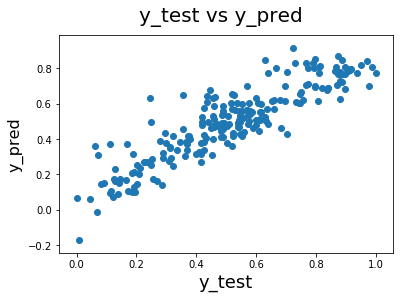

In [81]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_new)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

In [82]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred_new)

0.7880219317877523

We can see that the equation of our best fitted line is:

$cnt= 0.5499*temp-0.288*weather_Light_Snow+0.2331*yr_2019-0.1552*windspeed+0.1318*season_winter+0.0972*Sep+
0.0874*season_summer-0.0813*weather_Mist_Cloudy+0.0753*const+0.0677*Sat+0.0563*workingday$